# Cue combination and evidence accumulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
#import pymc as pm
#import arviz as az
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import warnings
import random
warnings.filterwarnings("ignore")

<b> Problem 5.5 <b>
    
This problem builds on Section 5.5 about evidence accumulation. An observer
infers a stimulus s from a sequence of measurements, xobs,1,xobs,2,...,xobs,T , made on a single trial.
The stimulus distribution is Gaussian with mean µ and variance σs2. The distribution of the tth
measurement, p(xt|s), is Gaussian with mean s and variance σ2 (identical for all measurements);
we assume conditional independence.
a) What are the mean and variance of the posterior? You may start with the equations in Section
5.4.
b) For a given stimulus s, we define relative bias as the difference between the mean PME and s
itself, divided by the difference between the mean of the stimulus distribution and s. Derive
an expression for relative bias in terms of µ, σ, σs, and T . Simplify the expression as much
as you can.
c) Interpret the expression in (b): explain intuitively how the dependencies on the variables
make sense
d) Compute the variance of the PME for given s.
e) Plot this variance as a function of T for all nine combinations of σs ∈ {1,2,5} and σ ∈
{1,2,5}. Create one plot for each value of σs, for a total of three plots, each containing three
curves (color-coded).
f) Interpret the plots in (e): explain intuitively how the shapes of the functions make sense.

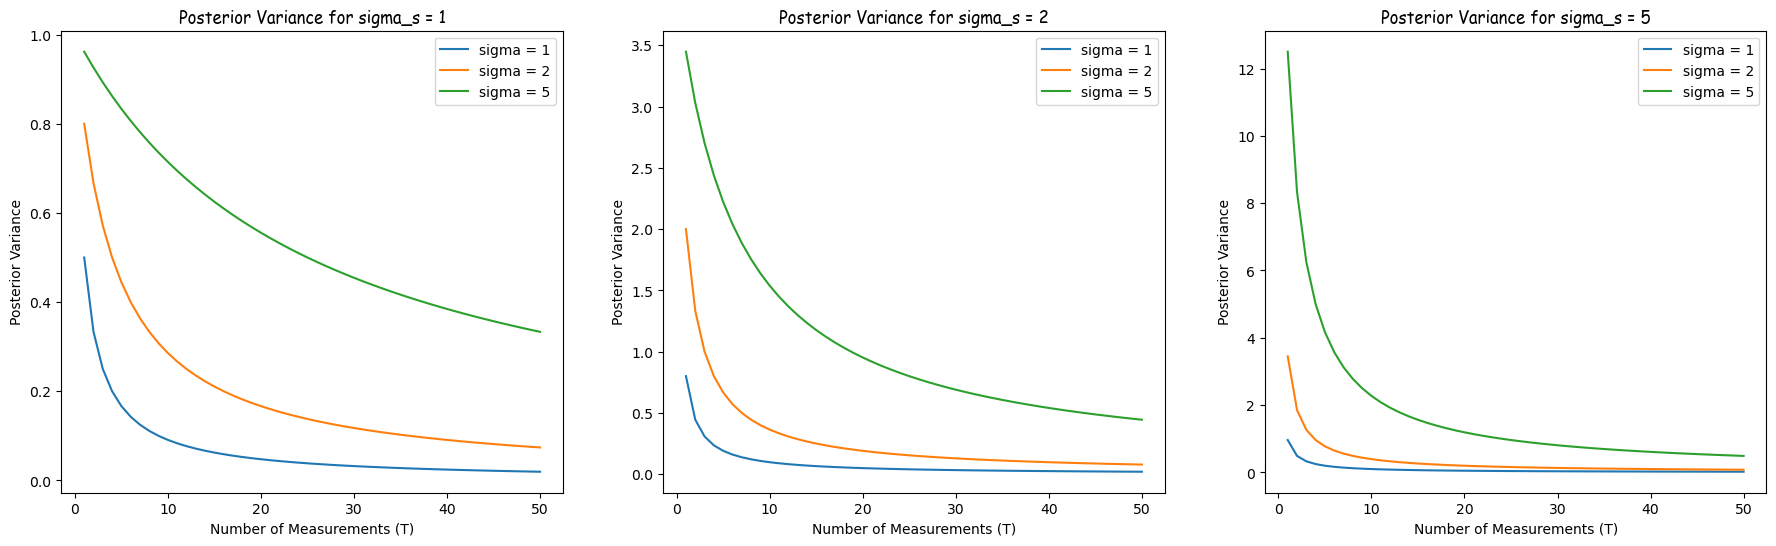

In [5]:
#Variance of PME for a given S: as the measurements are identical. varian PME= 1/K*J + Js

# Values for sigma_s and sigma
sigma_s_values = [1, 2, 5]
sigma_values = [1, 2, 5]
T_values = np.arange(1, 51, 1)
fig, axs = plt.subplots(1, 3, figsize=(22, 6))
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
for i, sigma_s in enumerate(sigma_s_values):
    for sigma in sigma_values:
        Js = 1/sigma_s**2
        J = 1/sigma**2
        var_post = [(1/(T*J + Js)) for T in T_values]
        axs[i].plot(T_values, var_post, label=f'sigma = {sigma}')
        axs[i].set_title(f'Posterior Variance for sigma_s = {sigma_s}', **csfont)
        axs[i].set_xlabel('Number of Measurements (T)')
        axs[i].set_ylabel('Posterior Variance')
        axs[i].legend()
        axs[i].grid(False)

plt.show()

Explanation: 

1. Variance reduce as T increase
2. When 𝜎 (measurement noise) is large, the posterior variance is higher for a given  𝑇. This is because each measurement is less reliable.
3. When 𝜎𝑠 (prior variance) is large, the posterior variance starts higher but decreases more quickly with increasing  𝑇. This is because the prior provides less initial information, so measurements have a greater impact in reducing uncertainty.

<b> Problem 5.6 <b>

In this problem, we examine suboptimal estimation in the context of cue combination. Suppose an observer estimates a stimulus s from two conditionally independent, Gaussiandistributed measurements, xobs,1 and xobs,2. The prior is flat.
a) We start with a reminder of optimal estimation. Express the PME in terms of the measurements.
b) What is the variance of the PME across trials?
c) Now suppose the observer uses an estimator of the form sˆ= wxobs,1 + (1 − w)xobs,2, where w
can be any constant. Show that this estimate is unbiased (just like the PME); this means that
the mean of the estimate for given s is equal to s.
d) What is the variance of this estimate as a function of w? Plot this function. At which value of w is it minimal, and does this value make sense? State your final conclusion in words.

In [9]:
w = np.array([2, 3, 4])
xobs = np.arange(1, 20, 0.1)
s = w.reshape(-1, 1) * xobs + (1 - w.reshape(-1, 1)) * xobs

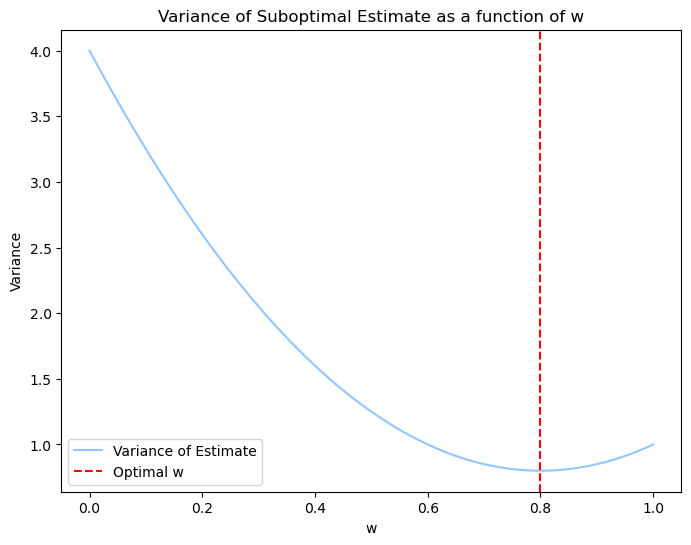

In [22]:
sigma1 = 1
sigma2 = 2
w_values = np.linspace(0, 1, 100)
var_estimate = w_values**2 * sigma1**2 + (1 - w_values)**2 * sigma2**2
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(8, 6))
plt.plot(w_values, var_estimate, label='Variance of Estimate')
plt.axvline(x=sigma2**2 / (sigma1**2 + sigma2**2), color='r', linestyle='--', label='Optimal w') #To find the value of w that minimizes the variance, we can take the derivative of the variance with respect to w and set it to zero
plt.xlabel('w')
plt.ylabel('Variance')
plt.title('Variance of Suboptimal Estimate as a function of w')
plt.legend()
plt.grid(False)
plt.show()

Explanation

This makes sense because the optimal 𝑤 weights each measurement inversely proportional to its variance, thereby minimizing the overall variance of the estimate. (the variance in w = 0.8, is lower than the variance of both observations, which make sense)

<b> Problem 5.7 <b>

In Chapters 3 and the present chapter, we were able to derive analytical expressions for the posterior distribution and the response distribution. For more complex psychophysical tasks (e.g. later in this book), however, analytical solutions often do not exist but we can still use numerical methods. To gain familiarity with such methods, we will work through the cue combination model in this chapter using numerical methods. We assume that the experimenter introduces a cue conflict between the auditory and the visual stimulus: s1 = 5 and s2 = 10. The
standard deviations of the auditory and of the visual noise are σ1 = 2 and σ2 = 1, respectively. We assume a flat prior over s.
a) Randomly draw an auditory measurement xobs,1 and a visual measurement xobs,2 from their respective distributions.
b) Plot the corresponding elementary likelihood functions, p(xobs,1|s) and p(xobs,2|s), in one
figure.
c) Calculate the combined likelihood function, p(xobs,1,xobs,2|s), by numerically multiplying the elementary likelihood functions. Plot this function.
d) Calculate the posterior distribution by numerically normalizing the combined likelihood function. Plot this distribution in the same figure as the likelihood functions.
e) Numerically find the PME of s, i.e., the value of s at which the posterior distribution is maximal.
f) Compare with the PME of s computed from Eq. (5.14) using the measurements drawn in (a).
g) In the above, we simulated a single trial and computed the observer’s PME of s, given the noisy measurements on that trial. If an analytical solution does not exist for the distribution of the PMEs, we can repeat the above procedure many times to approximate this distribution.
Here, we practice this method even though an analytical solution is available in this case. Draw 100 pairs (xobs,1,xobs,2) and numerically compute the observer’s PME for each pair as in (e).
h) Compute the mean of the PMEs obtained in (g) and compare with the mean estimate predicted using Eq. (5.19).
i) Make a histogram of the PME.
j) Relative (auditory) bias is defined as the mean PME minus the true auditory stimulus, divided
by the true visual stimulus minus the true auditory stimulus. Compute relative auditory bias
for your estimates.

In [124]:
#stimulus distributions
S_visual = 10
sigma_visual = 1
S_auditory = 5
sigma_auditor = 2

s_values = np.linspace(0, 15, 1000)
#Liklihood function
xobs_visual = np.random.normal(S_visual, sigma_visual)
xobs_auditory = np.random.normal(S_auditory, sigma_auditor)

#Liklihood_visual = (1 / (sigma_visual * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs_visual - s_values) / sigma_visual) ** 2)
#Liklihood_auditory = (1 / (S_auditory * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs_auditory - s_values) / S_auditory) ** 2)
Liklihood_visual =norm.pdf(s_values, xobs_visual, sigma_visual)
Liklihood_auditory =norm.pdf(s_values, xobs_auditory, sigma_auditor)
combined_liklihood = Liklihood_visual*Liklihood_auditory
Normalized = combined_liklihood / np.trapz(combined_liklihood, s_values) #np.trapz is an integral function

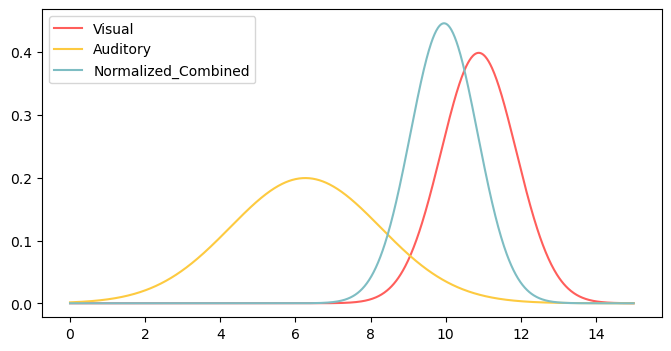

In [136]:
plt.figure(figsize= (8,4))
plt.style.use('seaborn-v0_8-pastel')
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.plot(s_values, Liklihood_visual, color = color_custom[0], label = 'Visual')
plt.plot(s_values, Liklihood_auditory, color = color_custom[1], label = 'Auditory')
#plt.plot(s_values, combined_liklihood, color = color_custom[2])
plt.plot(s_values, Normalized, color = color_custom[2], label = 'Normalized_Combined')
plt.legend()
plt.show()

In [151]:
#Lets compare the analytical and numerical solution for PME 


#Approach 1: Based on page 115 formula (Analytical)
J1 = 1/(sigma_auditor**2)
J2 = 1/(sigma_visual**2)
w1 = J1/(J1+J2)
w2 = J2/(J2+J1)
mu_post = w1*xobs_auditory + w2*xobs_visual
#mu_post = PME

#Approach 2: Based on Numerical

mu_post_n = s_values[np.argmax(Normalized)]

print(f'PME with analytical solution is : {mu_post}, and with numerical solution is: {mu_post_n}')

PME with analytical solution is : 9.953584045287919, and with numerical solution is: 9.954954954954955


In [153]:
#repeated measurement with creating different pairs of xobsvisual and xobsauditory

# Number of trials
n_trials = 100
pmes = np.zeros(n_trials)

for i in range(n_trials):
    xobs_auditory = np.random.normal(S_auditory, sigma_auditor)
    xobs_visual = np.random.normal(sigma_visual, sigma_visual)
    combined_likelihood = norm.pdf(s_values, xobs_auditory, sigma_auditor) * norm.pdf(s_values, xobs_visual, sigma_visual)
    posterior = combined_likelihood / np.trapz(combined_likelihood, s_values)
    pmes[i] = s_values[np.argmax(posterior)]

# Mean PME
mean_pme = np.mean(pmes)
mean_pme

1.7022522522522525

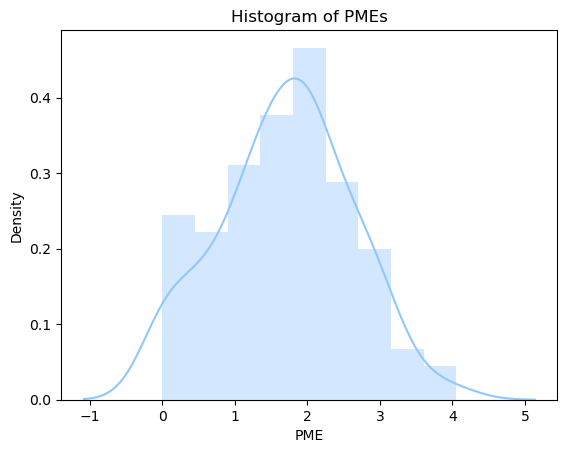

In [169]:
#plotting
sns.distplot(pmes)
plt.xlabel('PME')
plt.ylabel('Density')
plt.title('Histogram of PMEs')
plt.show()

In [171]:
#relative auditory bias

relative_auditorybias = (mean_pme -  S_auditory)/ (sigma_visual - S_auditory)
relative_auditorybias

0.8244369369369369